In [1]:
import requests
from bs4 import BeautifulSoup as BS
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('Expanded_Table.csv')
df['fp_100_mhhi'].fillna(df['fp_100_mhhi'].mean(), inplace=True)

In [12]:
scaler = MinMaxScaler()
df[['fp_100_mhhi', 'IPV_DIR']] = scaler.fit_transform(df[['fp_100_mhhi', 'IPV_DIR']])

df.head()

,borocd,cd_short_title,IPV_DIR,FAM_DIR,FAM_Fel_Assault,DV_Fel_Assault,FAM_Rape,DV_Rape,lots_parking,acres,...,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc
0,101,Manhattan CD 1,0.034338,121,2,18,0,0,23,976.3,...,Resiliency,Traffic,Other,36115322,12.8,14.5,21,4.2,2.8,4.9
1,102,Manhattan CD 2,0.000000,159,4,19,0,0,52,865.9,...,Affordable housing,Parks,Schools,25696432,12.8,14.5,21,4.2,2.8,4.9
2,103,Manhattan CD 3,0.332372,1497,51,123,3,18,57,1076.9,...,Affordable housing,Senior services,Other,33692052,11.7,14.5,21,4.2,4.1,4.9
3,104,Manhattan CD 4,0.216252,568,7,58,2,10,77,1131.6,...,Affordable housing,Neighborhood preservation (development trends),Traffic,38177268,8.2,14.5,21,4.2,3.7,4.9
4,105,Manhattan CD 5,0.087287,251,9,38,1,5,39,1005.4,...,Affordable housing,Social services (including services for the ho...,Transit (buses & subways),28192622,8.2,14.5,21,4.2,3.7,4.9


In [13]:
fig = go.Figure(data=[go.Bar(name='Income', x = df['cd_short_title'], y=df['fp_100_mhhi']),
                      go.Bar(name='IVP', x = df['cd_short_title'], y = df['IPV_DIR'])
                      
                     ])
fig.update_layout(barmode='group')
fig.show()

In [18]:
df = pd.read_csv('Expanded_Table.csv')
df['fp_100_mhhi'].dropna(inplace=True)

df.shape

(59, 181)

In [15]:
fig = go.Figure(data=[go.Bar(name='Income', x = df['cd_short_title'], y=df['fp_100_mhhi']),
                      go.Bar(name='IVP', x = df['cd_short_title'], y = df['IPV_DIR'])
                      
                     ])
fig.update_layout(barmode='group')
fig.show()

In [4]:
dfi = pd.read_csv('Issues_Table.csv')

In [5]:
dfi.head()

,borocd,cd_short_title,IPV_DIR,son_issue_1,son_issue_2,son_issue_3
0,101,Manhattan CD 1,623,Resiliency,Traffic,Other
1,102,Manhattan CD 2,492,Affordable housing,Parks,Schools
2,103,Manhattan CD 3,1760,Affordable housing,Senior services,Other
3,104,Manhattan CD 4,1317,Affordable housing,Neighborhood preservation (development trends),Traffic
4,105,Manhattan CD 5,825,Affordable housing,Social services (including services for the ho...,Transit (buses & subways)


In [12]:
no1 = dfi.groupby('son_issue_1')['borocd'].count()

In [11]:
no2 = dfi.groupby('son_issue_2')['borocd'].count()

In [10]:
no3 = dfi.groupby('son_issue_3')['borocd'].count()

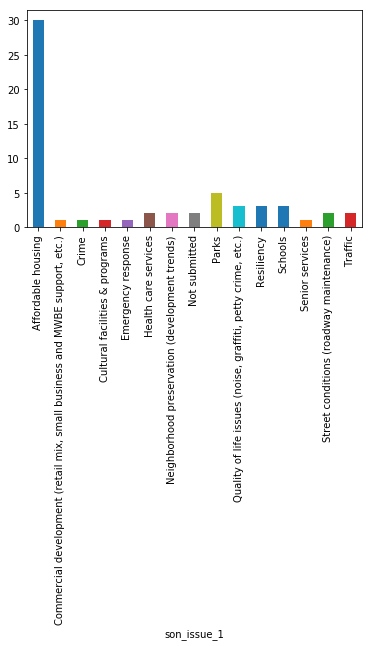

In [16]:
ax1 = no1.plot.bar()

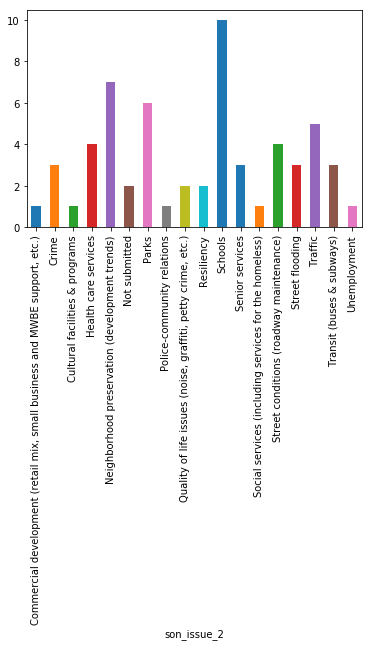

In [15]:
ax2 = no2.plot.bar()

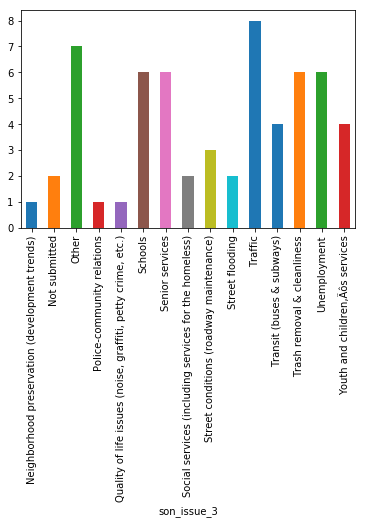

In [17]:
ax3 = no3.plot.bar()